In [61]:
import re
import xlrd

from lxml import etree

import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [81]:
asuntohinnat_df = pd.read_table('../Dropbox/koodailuprojektit/asuntojen_keskihinta/keskihinnat_talotyypit_yht.csv',sep=';',encoding='latin-1')

In [82]:
asuntohinnat_df['Keskiarvo']=asuntohinnat_df['Keskiarvo'].str.replace('\.','0').astype(int)
asuntohinnat_df['Lukumäärä']=asuntohinnat_df['Lukumäärä'].str.replace('\.','0').astype(int)

In [85]:
asuntohinnat_df = asuntohinnat_df[asuntohinnat_df['Keskiarvo']>0]

In [94]:
asuntohinnat_df

,Vuosi,Neljännes,Talotyyppi,Postinumero,Rakennusvuosi,Keskiarvo,Lukumäärä
0,2005,Koko vuosi,Talotyypit yhteensä,100,-1949,3606,507
1,2005,Koko vuosi,Talotyypit yhteensä,100,1960-1969,4007,7
7,2005,Koko vuosi,Talotyypit yhteensä,120,-1949,3987,188
8,2005,Koko vuosi,Talotyypit yhteensä,120,1960-1969,3387,34
12,2005,Koko vuosi,Talotyypit yhteensä,120,2000-,4797,22
14,2005,Koko vuosi,Talotyypit yhteensä,130,-1949,4096,67
21,2005,Koko vuosi,Talotyypit yhteensä,140,-1949,4297,228
22,2005,Koko vuosi,Talotyypit yhteensä,140,1960-1969,3971,53
23,2005,Koko vuosi,Talotyypit yhteensä,140,1970-1979,4345,16
27,2005,Koko vuosi,Talotyypit yhteensä,140,1950-1959,3981,15


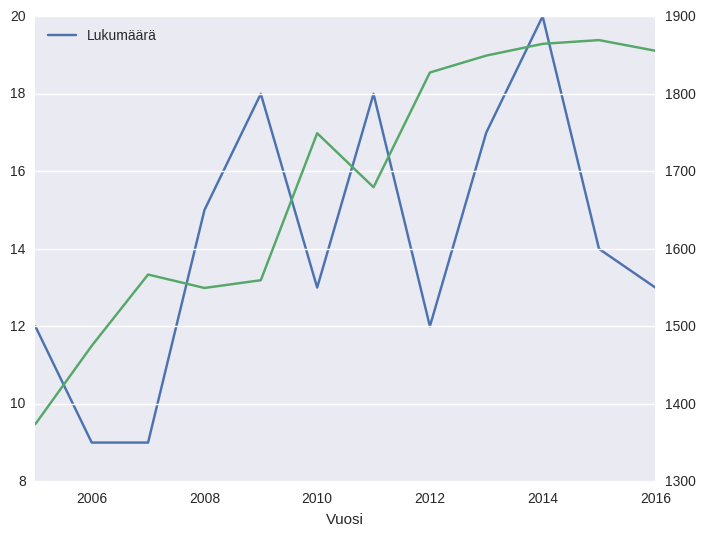

In [169]:
fig, ax = plt.subplots(figsize=(8,6))

postinro=20540

#asuntohinnat_df[asuntohinnat_df['Postinumero']==20540].groupby('Rakennusvuosi').plot(x='Vuosi', y='Keskiarvo', ax=ax)
asuntohinnat_df[(asuntohinnat_df['Postinumero']==postinro)&(asuntohinnat_df['Rakennusvuosi']=='2000-')].plot(x='Vuosi', y='Lukumäärä', ax=ax)

asuntohinnat_df[(asuntohinnat_df['Postinumero']==postinro)&~(asuntohinnat_df['Rakennusvuosi']=='2000-')].groupby('Vuosi').Keskiarvo.mean().plot(ax=ax,secondary_y=True)

In [125]:
foo = pd.DataFrame(asuntohinnat_df[(asuntohinnat_df['Postinumero']==postinro)&~(asuntohinnat_df['Rakennusvuosi']=='2000-')].groupby('Vuosi').Keskiarvo.mean())

In [126]:
foo['lkm'] = asuntohinnat_df[(asuntohinnat_df['Postinumero']==postinro)&(asuntohinnat_df['Rakennusvuosi']=='2000-')].set_index('Vuosi').Lukumäärä

In [129]:
foo

,Keskiarvo,lkm
Vuosi,,
2005,1373.833333,12
2006,1474.833333,9
2007,1566.833333,9
2008,1549.500000,15
2009,1559.500000,18
2010,1749.166667,13
2011,1679.500000,18
2012,1827.500000,12
2013,1849.333333,17


In [199]:
testi = asuntohinnat_df[asuntohinnat_df['Rakennusvuosi']=='2000-'].set_index(['Postinumero','Vuosi']).sort_index()

In [200]:
testi['hinta'] = asuntohinnat_df[~(asuntohinnat_df['Rakennusvuosi']=='2000-')].groupby(['Postinumero','Vuosi']).Keskiarvo.mean()

In [201]:
testi['saad_lukumaara']=testi['Lukumäärä']
testi['saad_hinta'] = testi['hinta']

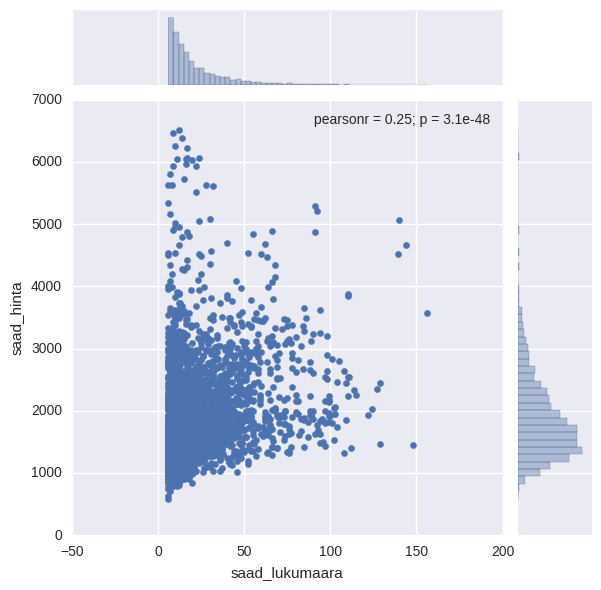

In [202]:
sns.jointplot(x='saad_lukumaara',y='saad_hinta',data=testi.dropna())

In [171]:
testi[['Lukumäärä','hinta']].corr()

,Lukumäärä,hinta
Lukumäärä,1.000000,0.252916
hinta,0.252916,1.000000


In [172]:
testi

Neljännes           Talotyyppi Rakennusvuosi  Keskiarvo  \
Postinumero Vuosi                                                             
100         2011   Koko vuosi  Talotyypit yhteensä         2000-       7389   
            2012   Koko vuosi  Talotyypit yhteensä         2000-       7693   
            2014   Koko vuosi  Talotyypit yhteensä         2000-       7419   
            2015   Koko vuosi  Talotyypit yhteensä         2000-       8219   
            2016   Koko vuosi  Talotyypit yhteensä         2000-       7072   
120         2005   Koko vuosi  Talotyypit yhteensä         2000-       4797   
            2006   Koko vuosi  Talotyypit yhteensä         2000-       5111   
            2007   Koko vuosi  Talotyypit yhteensä         2000-       5646   
            2008   Koko vuosi  Talotyypit yhteensä         2000-       6250   
            2009   Koko vuosi  Talotyypit yhteensä         2000-       5815   
            2010   Koko vuosi  Talotyypit yhteensä         2000-       6945   
            2011   Koko vuosi  Talotyypit yhteensä         2000-       6481   
            2012   Koko vuosi  Talotyypit yhteensä         2000-       7005   
            2013   Koko vuosi  Talotyypit yhteensä         2000-       7001   
            2014   Koko vuosi  Talotyypit yhteensä         2000-       7017   
            2015   Koko vuosi  Talotyypit yhteensä         2000-       7110   
            2016   Koko vuosi  Talotyypit yhteensä         2000-       7180   
150         2010   Koko vuosi  Talotyypit yhteensä         2000-       8515   
            2012   Koko vuosi  Talotyypit yhteensä         2000-       7571   
            2013   Koko vuosi  Talotyypit yhteensä         2000-       8774   
            2015   Koko vuosi  Talotyypit yhteensä         2000-       8115   
            2016   Koko vuosi  Talotyypit yhteensä         2000-       7998   
160         2012   Koko vuosi  Talotyypit yhteensä         2000-       7044   
            2014   Koko vuosi  Talotyypit yhteensä         2000-       6894   
            2015   Koko vuosi  Talotyypit yhteensä         2000-       6795   
180         2016   Koko vuosi  Talotyypit yhteensä         2000-       7712   
210         2005   Koko vuosi  Talotyypit yhteensä         2000-       3906   
            2006   Koko vuosi  Talotyypit yhteensä         2000-       4339   
            2007   Koko vuosi  Talotyypit yhteensä         2000-       4817   
            2008   Koko vuosi  Talotyypit yhteensä         2000-       4790   
...                       ...                  ...           ...        ...   
96300       2006   Koko vuosi  Talotyypit yhteensä         2000-       1991   
            2007   Koko vuosi  Talotyypit yhteensä         2000-       1952   
            2008   Koko vuosi  Talotyypit yhteensä         2000-       1727   
            2009   Koko vuosi  Talotyypit yhteensä         2000-       2141   
            2010   Koko vuosi  Talotyypit yhteensä         2000-       2285   
            2011   Koko vuosi  Talotyypit yhteensä         2000-       2359   
            2012   Koko vuosi  Talotyypit yhteensä         2000-       2269   
            2013   Koko vuosi  Talotyypit yhteensä         2000-       2337   
            2014   Koko vuosi  Talotyypit yhteensä         2000-       2481   
            2015   Koko vuosi  Talotyypit yhteensä         2000-       2514   
            2016   Koko vuosi  Talotyypit yhteensä         2000-       2515   
96900       2005   Koko vuosi  Talotyypit yhteensä         2000-       1517   
            2006   Koko vuosi  Talotyypit yhteensä         2000-       1863   
            2007   Koko vuosi  Talotyypit yhteensä         2000-       1848   
            2008   Koko vuosi  Talotyypit yhteensä         2000-       1962   
            2009   Koko vuosi  Talotyypit yhteensä         2000-       2014   
            2010   Koko vuosi  Talotyypit yhteensä         2000-       2071   
            2011   Koko vuosi  Talotyypit yhteensä         2000-      